In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
# run the above cell to get the data from overpass, which we then import below and turn into a geojson file
df = pd.read_pickle('./data/saunas.pkl')
saunas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon,df.lat))

In [3]:
saunas.head()

,type,id,lat,lon,tags,geometry
0,node,282605605,67.065282,27.226692,"{'description': 'Pyhän Oravan rantasauna, joss...",POINT (27.22669 67.06528)
1,node,308296177,62.989946,29.918683,"{'leisure': 'sauna', 'name': 'Kiviniemen sauna...",POINT (29.91868 62.98995)
2,node,386025854,61.475913,23.894145,{'leisure': 'sauna'},POINT (23.89414 61.47591)
3,node,440322409,60.806357,24.609396,"{'leisure': 'sauna', 'note': 'miesten sauna ja...",POINT (24.60940 60.80636)
4,node,466976088,60.474127,22.004490,{'leisure': 'sauna'},POINT (22.00449 60.47413)


In [4]:
world = gpd.read_file('./maps/ne_10m_admin_1_states_provinces_lakes.shp')
country = world.query('admin in ["Finland", "Aland"]')

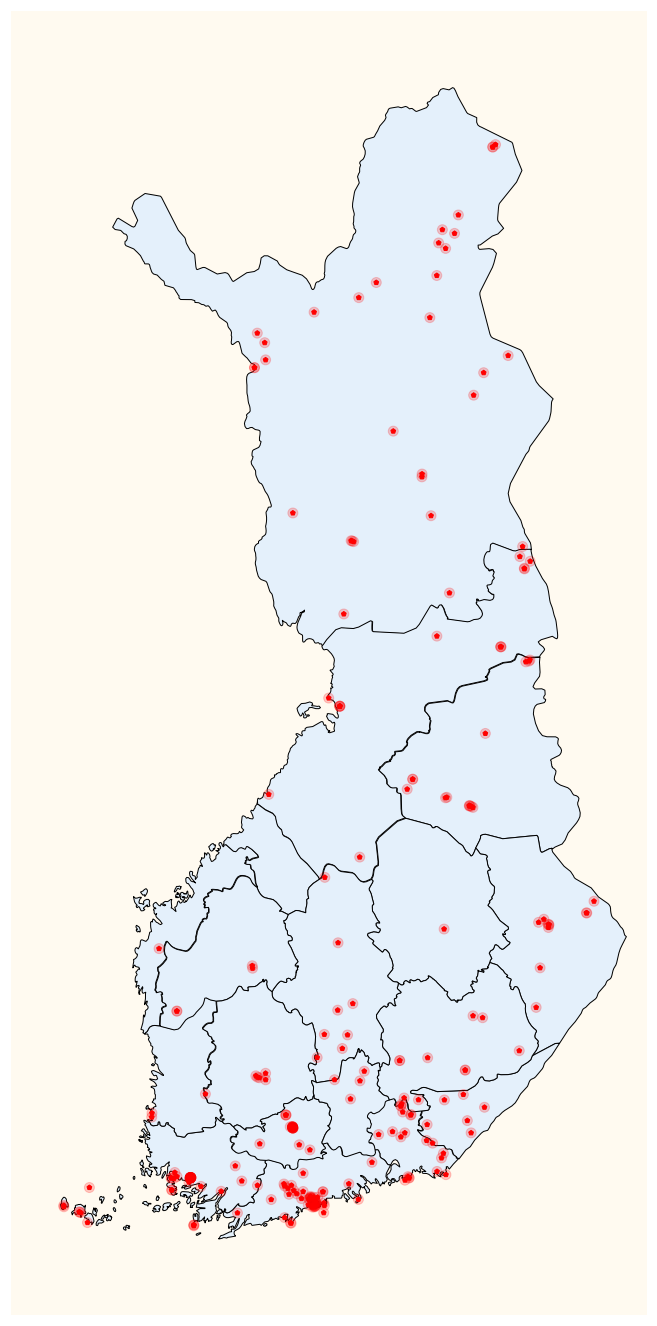

In [5]:
background_color = "#fffaf0"

ax = gplt.polyplot(country, 
                      figsize=(24, 24), 
                      projection=gcrs.Mercator(),
                      facecolor="#E4F0FB"
                     )
j = gplt.pointplot(saunas, ax=ax, color='red',marker="o", alpha=0.2, s=10)
k = gplt.pointplot(saunas, ax=ax, color='red',marker="p")
ax.patch.set_facecolor(background_color)
plt.savefig('./output/saunas_in_finland.png', facecolor=background_color)
plt.show()
